In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9126
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 0.9650
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.9761
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0028 - accuracy: 0.9860
Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0024 - accuracy: 0.9884
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9903
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9919
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9928
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9939


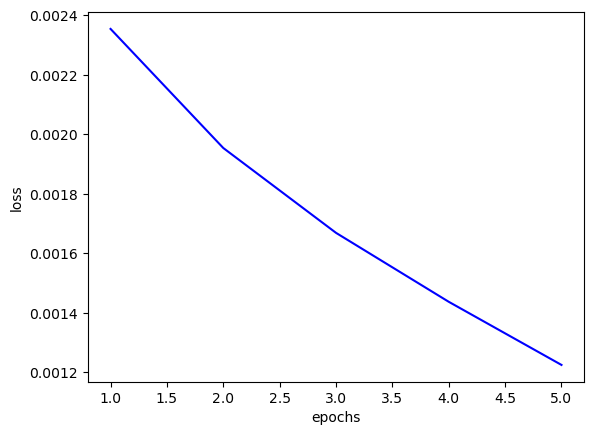

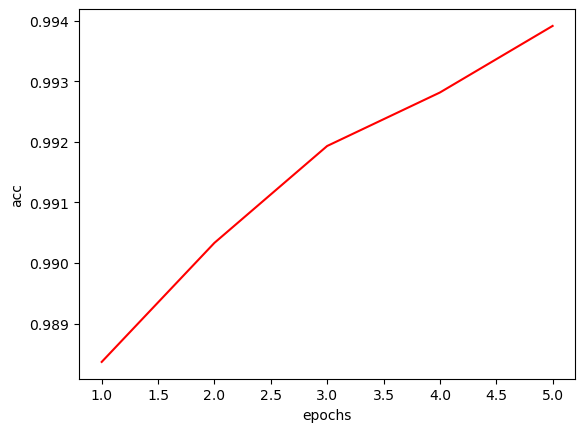

In [8]:

plt.figure(1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.figure(2)
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

① Plot the accuracy when you have [1,2,3] hidden layers in DNN model [Don’t change
other parameters]

② Plot the accuracy when you change batchsize to 16, 32, 64, 128 [Don’t change other
parameters]

③ Plot the accuracy when you change the activation function from ReLU to sigmoid
[Don’t change other parameters]

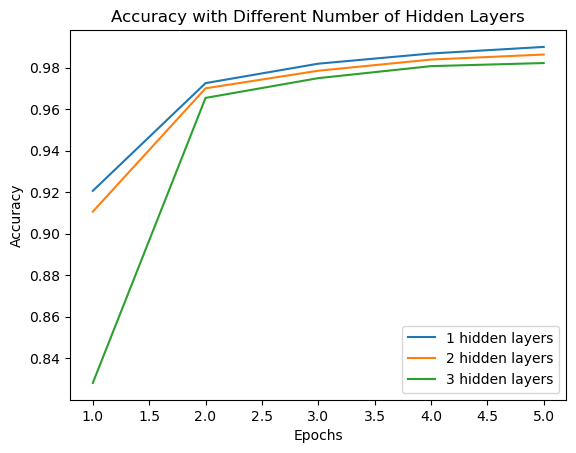

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

def build_and_train_model(hidden_layers, activation='relu', batch_size=128):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(512, activation=activation, input_shape=(784,)))
    for _ in range(hidden_layers):
        model.add(tf.keras.layers.Dense(512, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, verbose=0)
    return history.history['accuracy']

accuracies = []
for layers in [1, 2, 3]:
    acc = build_and_train_model(layers)
    accuracies.append(acc)

epochs = range(1, 6)
plt.figure()
for i, acc in enumerate(accuracies):
    plt.plot(epochs, acc, label=f'{i+1} hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with Different Number of Hidden Layers')
plt.show()

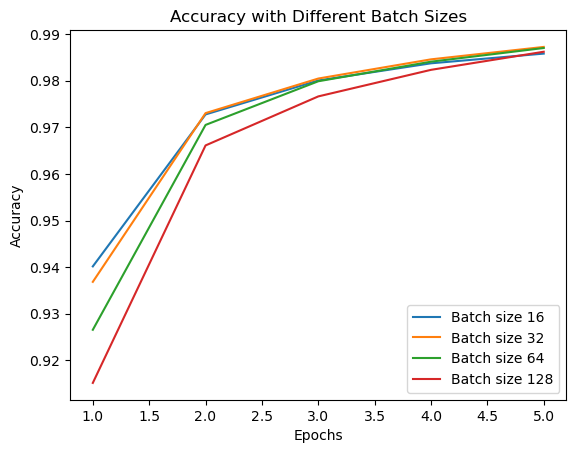

In [12]:
def build_and_train_model_with_batch_size(batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, verbose=0)
    return history.history['accuracy']

batch_sizes = [16, 32, 64, 128]
accuracies = []
for bs in batch_sizes:
    acc = build_and_train_model_with_batch_size(bs)
    accuracies.append(acc)

plt.figure()

for bs, acc in zip(batch_sizes, accuracies):
    plt.plot(epochs, acc, label=f'Batch size {bs}')
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with Different Batch Sizes')
plt.show()


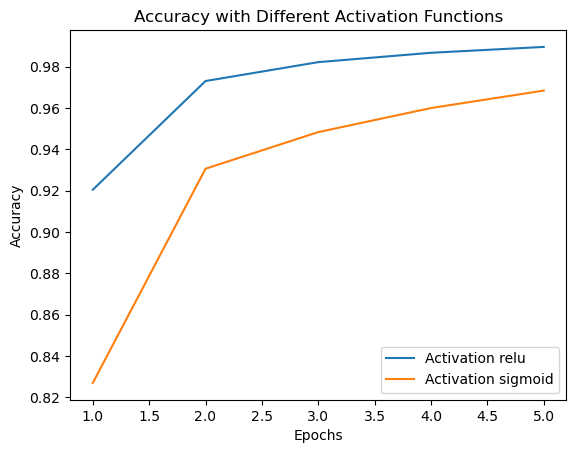

In [11]:
def build_and_train_model_with_activation(activation):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(512, activation=activation, input_shape=(784,)))
    model.add(tf.keras.layers.Dense(512, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
    return history.history['accuracy']

activations = ['relu', 'sigmoid']
accuracies = []
for act in activations:
    acc = build_and_train_model_with_activation(act)
    accuracies.append(acc)

plt.figure()

for act, acc in zip(activations, accuracies):
    plt.plot(epochs, acc, label=f'Activation {act}')
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with Different Activation Functions')
plt.show()